In [1]:
from scipy import misc

ascent_image = misc.ascent()

C:\Users\Adri\AppData\Local\Temp\ipykernel_2108\82814347.py:3: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent_image = misc.ascent()


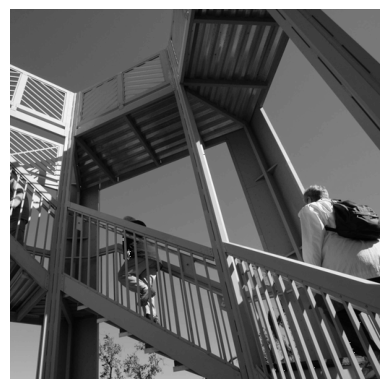

In [2]:
import matplotlib.pyplot as plt
plt.grid(False) # Para no mostrar la rejilla
plt.gray() # Poner en escala de grises
plt.axis('off') # No muestra los ejes
plt.imshow(ascent_image)
plt.show()

In [3]:
import numpy as np

image_transformed = np.copy(ascent_image) # Copia la imagen
size_x, size_y = image_transformed.shape[0], image_transformed.shape[1]

In [4]:
size_x, size_y

(512, 512)

In [5]:
filtros = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # Filtro que va a aprender la red neuronal
weight = 1

In [6]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0
        convolution += ascent_image[x - 1 ,y + 0]*filtros[0][1]
        convolution += ascent_image[x - 1 ,y - 1]*filtros[0][0]
        convolution += ascent_image[x - 1 ,y + 1]*filtros[0][2]
        convolution += ascent_image[x + 0 ,y + 1]*filtros[1][0]
        convolution += ascent_image[x + 0 ,y + 0]*filtros[1][1]
        convolution += ascent_image[x + 0 ,y + 1]*filtros[1][2]
        convolution += ascent_image[x + 1 ,y - 1]*filtros[2][0]
        convolution += ascent_image[x + 1 ,y + 0]*filtros[2][1]
        convolution += ascent_image[x + 1 ,y + 1]*filtros[2][2]

        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        
        image_transformed[x, y] = convolution

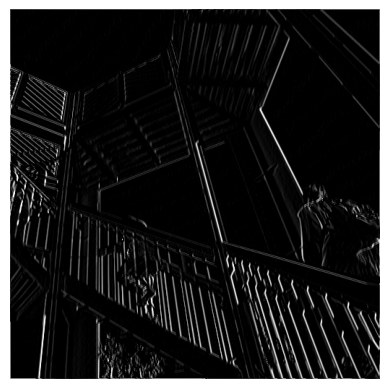

In [7]:
plt.gray()
plt.axis('off') 
plt.grid(False)
plt.imshow(image_transformed)

### Nueva imagen

In [10]:
new_x, new_y = int(size_x/2), int(size_y/2) # Calcula las coordenadas del centro de la nueva imagen

newImage = np.zeros((new_x, new_y)) # Crea una nueva imagen vacía (llena de ceros) con las dimensiones reducidas

# Recorre la imagen original de dos en dos píxeles
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        # Almacena los valores de los cuatro píxeles adyacentes en una lista
        pixels = [
            image_transformed[x + 0, y + 0],
            image_transformed[x + 1, y + 0],
            image_transformed[x + 0, y + 1],
            image_transformed[x + 1, y + 1]
        ]

        # Calcula el máximo valor de los píxeles y lo asigna a la posición correspondiente en la nueva imagen reducida
        newImage[int(x/2), int(y/2)] = max(pixels)


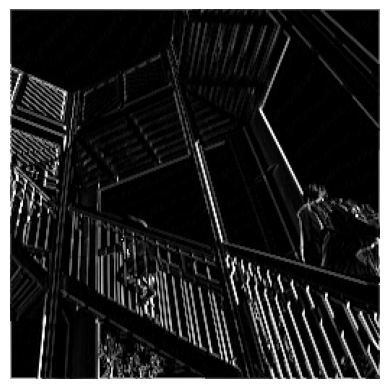

In [11]:
plt.gray()
plt.axis('off') 
plt.grid(False)
plt.imshow(newImage)